In [1]:
from keras.datasets import fashion_mnist  
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(10)  
  
# Read MNIST data  
(X_train_M, y_train_M), (X_test_M, y_test_M) = fashion_mnist.load_data()  

X = np.concatenate((X_train_M, X_test_M))
y = np.concatenate((y_train_M, y_test_M))

/Users/wangfan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Translation of data  
X_4D = X.reshape(X.shape[0], 28, 28, 1).astype('float32')  

# Standardize
X_4D_norm = X_4D/255

# Label Onehot-encoding 
y_Onehot = to_categorical(y)

In [3]:
X_train, X_test,y_train, y_test = train_test_split(X_4D_norm, y_Onehot, test_size=0.25, random_state=42)
np.save('X_test_FM.npy', X_test)
np.save('y_test_FM.npy', y_test)

In [4]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 
import keras
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=32,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 kernel_regularizer =keras.regularizers.l1(0.01),
                 name='conv2d_1')) 
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  

# Add Dropout layer  
model.add(Dropout(0.5, name='dropout_1'))
  
# Create CN layer 2  
model.add(Conv2D(filters=64,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  
  
# Add Dropout layer  
model.add(Dropout(0.5, name='dropout_2'))

/Users/wangfan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.add(Flatten(name='flatten_1'))

In [6]:
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_4'))

In [7]:
model.add(Dense(10, activation='softmax', name='dense_2'))

In [8]:
model.summary()  
print("")  

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.optimizers import SGD

# 定義訓練方式  
sgd = SGD(learning_rate = 0.001, momentum = 0.95)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_train,  
                          y=y_train, validation_split=0.2,  
                          epochs=100, batch_size=256, verbose=1)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5413 - loss: 1.3991 - val_accuracy: 0.7998 - val_loss: 0.6472
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7703 - loss: 0.7096 - val_accuracy: 0.8338 - val_loss: 0.5390
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7995 - loss: 0.6114 - val_accuracy: 0.8455 - val_loss: 0.4939
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8142 - loss: 0.5571 - val_accuracy: 0.8518 - val_loss: 0.4593
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8282 - loss: 0.5259 - val_accuracy: 0.8608 - val_loss: 0.4404
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8329 - loss: 0.5063 - val_accuracy: 0.8630 - val_loss: 0.4156
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8329 - loss: 0.4938 - val_accuracy: 0.8650 - val_loss: 0.4046
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8396 - loss: 0.4832 - 

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26916685700416565
Test accuracy: 0.9088571667671204


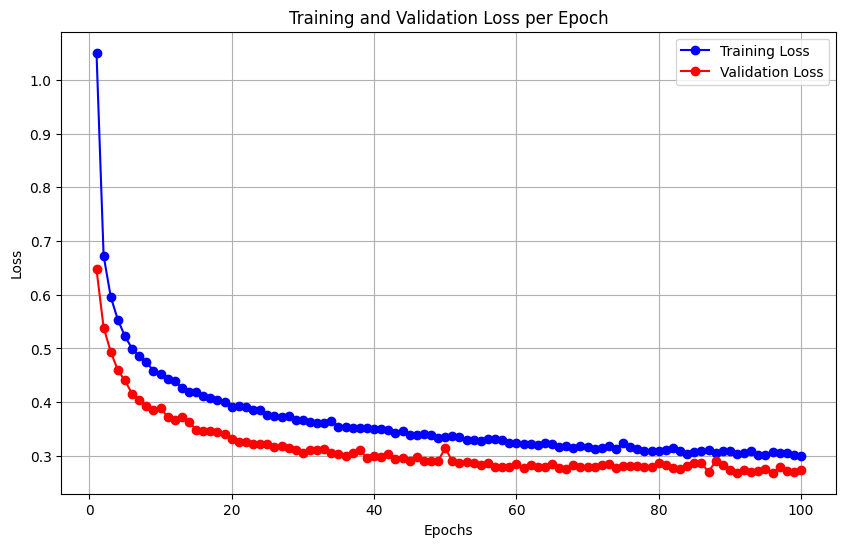

In [11]:
import matplotlib.pyplot as plt
# Extract loss values
train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

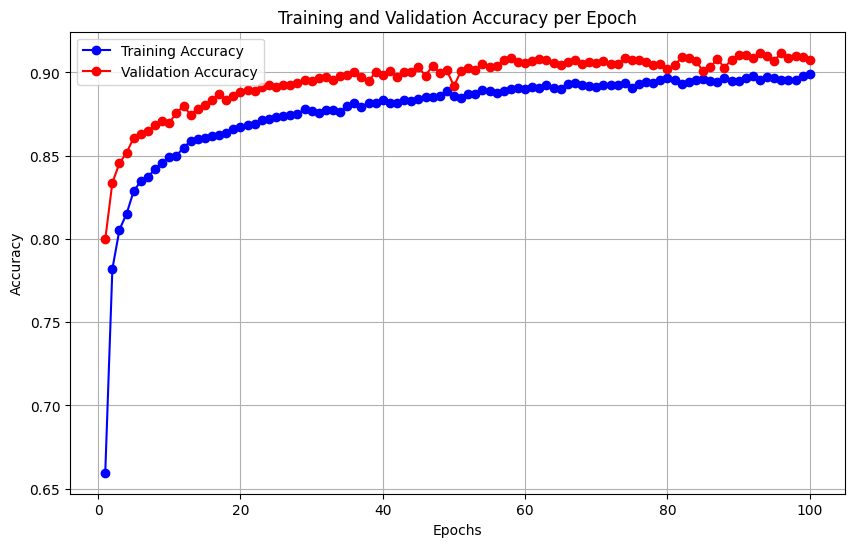

In [12]:
# 提取準確率數據
train_acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# 繪製準確率曲線
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model.save('//Users//wangfan//Documents//Uncertainty Projects//F_mnist_cnn.keras')